In [1]:
import os
import requests
import zipfile
from io import BytesIO

In [2]:
import pandas as pd
import rdkit
import molvs
import re
from rdkit import Chem

In [ ]:
## IMPORT AND EXTRACT DUD-E DATA FROM ZENODO ##

# Download Zenodo ZIP file URLs (21 Targets)
zenodo_urls = [
    "https://zenodo.org/records/10257101/files/DUDE_ADA_2e1w.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_AKT1_3cqw.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_AMPC_1ls2.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_CASP3_2cnk.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_CP3A4_3nxu.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_CXCR4_3odu.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_FA7_1w7x.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_FABP4_2nnq.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_FFPS_1zw5.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_GCR_3bqd.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_GLCM_2v3f.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_HIVPR_1xl2.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_HIVRT_3lan.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_HS90A_1uyg.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_ITAL_2ica.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_KIF11_3cjo.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_MK14_2qd9.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_NRAM_1b9v.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_PA2GA_1kvo.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_TRY1_2ayw.zip?download=1",
    "https://zenodo.org/records/10257101/files/DUDE_WEE1_3biz.zip?download=1"
]

# Store the data in a new directory
output_dir = "essence_dock_data"
os.makedirs(output_dir, exist_ok=True)

# Download and extract each ZIP file
for url in zenodo_urls:
    print(f"Downloading: {url}")
    response = requests.get(url, stream=True)
    with zipfile.ZipFile(BytesIO(response.content)) as z:
        z.extractall(output_dir)

In [3]:
# For each target, create a dataframe with the compound name, compound SMILES, target name, active or decoy status,
# individual model scoring, concensus scoring

In [ ]:
##############################
## Extract Active Compounds ##
##############################
type = "Active"

# List of targets and their corresponding file paths
targets = {
    "ADA": "essence_dock_data/ADA_Undocked/ada_actives_final.ism",
    "AKT1": "essence_dock_data/AKT1_Undocked/actives_final.ism",
    "AMPC": "essence_dock_data/AMPC_Undocked/ampc_actives_final.ism",
    "CASP3": "essence_dock_data/CASP3_Undocked/actives_final.ism",
    "CP3A4": "essence_dock_data/CP3A4_Undocked/actives_final.ism",
    "CXCR4": "essence_dock_data/CXCR4_Undocked/actives_final.ism",
    "FA7": "essence_dock_data/FA7_Undocked/actives_final.ism",
    "FABP4": "essence_dock_data/FABP4_Undocked/actives_final.ism",
    "FPPS": "essence_dock_data/FPPS_Undocked/fpps_actives_final.ism",
    "GCR": "essence_dock_data/GCR_Undocked/gcr_actives_final.ism",
    "GLCM": "essence_dock_data/GLCM_Undocked/glcm_actives_final.ism",
    "HIVPR": "essence_dock_data/HIVPR_Undocked/actives_final.ism",
    "HIVRT": "essence_dock_data/HIVRT_Undocked/actives_final.ism",
    "HS90A": "essence_dock_data/HS90A_Undocked/hs90a_actives_final.ism",
    "ITAL": "essence_dock_data/ITAL_Undocked/actives_final.ism",
    "KIF11": "essence_dock_data/KIF11_Undocked/actives_final.ism",
    "MK14": "essence_dock_data/MK14_Undocked/mk14_actives_final.ism",
    "NRAM": "essence_dock_data/NRAM_Undocked/actives_final.ism",
    "PA2GA": "essence_dock_data/PA2GA_Undocked/actives_final.ism",
    "TRY1": "essence_dock_data/TRY1_Undocked/try1_actives_final.ism",
    "WEE1": "essence_dock_data/WEE1_Undocked/wee1_actives_final.ism"
}

# Loop through each target and process the corresponding .ism file
for target, file_path in targets.items():
    smiles_list = []
    names_list = []

    # Read and parse the .ism file
    with open(file_path, "r") as f:
        for line in f:
            parts = line.strip().split(" ", 2)  # Split into SMILES and name
            if len(parts) == 3:
                smiles = parts[0]
                name = parts[2]
            elif len(parts) == 2:
                smiles = parts[0]
                name = parts[1]
            elif len(parts) == 1:
                smiles = parts[0]
                name = "Unknown"
            smiles_list.append(smiles)
            names_list.append(name)

    # Create a DataFrame
    df = pd.DataFrame({"SMILES": smiles_list, "Molecule Name": names_list,
                      "Target Name": target, "Type": type})

    # Save to CSV
    output_file = f"Actives/actives_table_{target}.csv"
    df.to_csv(output_file, index=False)

    print(f"Processed: {file_path} → {output_file}")

print("✅ All targets processed successfully!")

In [ ]:
##############################
## Extract Decoy Compounds ##
##############################
type = "Decoy"

# List of targets and their corresponding file paths
targets = {
    "ADA": "essence_dock_data/ADA_Undocked/ada_decoys_final.ism",
    "AKT1": "essence_dock_data/AKT1_Undocked/decoys_final.ism",
    "AMPC": "essence_dock_data/AMPC_Undocked/ampc_decoys_final.ism",
    "CASP3": "essence_dock_data/CASP3_Undocked/decoys_final.ism",
    "CP3A4": "essence_dock_data/CP3A4_Undocked/decoys_final.ism",
    "CXCR4": "essence_dock_data/CXCR4_Undocked/decoys_final.ism",
    "FA7": "essence_dock_data/FA7_Undocked/decoys_final.ism",
    "FABP4": "essence_dock_data/FABP4_Undocked/decoys_final.ism",
    "FPPS": "essence_dock_data/FPPS_Undocked/fpps_decoys_final.ism",
    "GCR": "essence_dock_data/GCR_Undocked/gcr_decoys_final.ism",
    "GLCM": "essence_dock_data/GLCM_Undocked/glcm_decoys_final.ism",
    "HIVPR": "essence_dock_data/HIVPR_Undocked/decoys_final.ism",
    "HIVRT": "essence_dock_data/HIVRT_Undocked/decoys_final.ism",
    "HS90A": "essence_dock_data/HS90A_Undocked/hs90a_decoys_final.ism",
    "ITAL": "essence_dock_data/ITAL_Undocked/decoys_final.ism",
    "KIF11": "essence_dock_data/KIF11_Undocked/decoys_final.ism",
    "MK14": "essence_dock_data/MK14_Undocked/mk14_decoys_final.ism",
    "NRAM": "essence_dock_data/NRAM_Undocked/decoys_final.ism",
    "PA2GA": "essence_dock_data/PA2GA_Undocked/decoys_final.ism",
    "TRY1": "essence_dock_data/TRY1_Undocked/try1_decoys_final.ism",
    "WEE1": "essence_dock_data/WEE1_Undocked/wee1_decoys_final.ism"
}

# Loop through each target and process the corresponding .ism file
for target, file_path in targets.items():
    smiles_list = []
    names_list = []

    # Read and parse the .ism file
    with open(file_path, "r") as f:
        for line in f:
            parts = line.strip().split(" ", 2)  # Split into SMILES and name
            if len(parts) == 3:
                smiles = parts[0]
                name = parts[2]
            elif len(parts) == 2:
                smiles = parts[0]
                name = parts[1]
            elif len(parts) == 1:
                smiles = parts[0]
                name = "Unknown"
            smiles_list.append(smiles)
            names_list.append(name)

    # Create a DataFrame
    df = pd.DataFrame({"SMILES": smiles_list, "Molecule Name": names_list,
                      "Target Name": target, "Type": type})

    # Save to CSV
    output_file = f"Decoys/decoys_table_{target}.csv"
    df.to_csv(output_file, index=False)

    print(f"Processed: {file_path} → {output_file}")

print("✅ All targets processed successfully!")

In [37]:
rm -rf Actives/.ipynb_checkpoints

In [ ]:
####################################################
## Sanitize Molecule SMILES using MolVS - Actives ##
####################################################

def sanitize_smiles(smiles_raw):
    mol = rdkit.Chem.MolFromSmiles(smiles_raw)
    mol = standardizer.standardize(mol)
    mol = fragment_remover.remove(mol)
    smiles = rdkit.Chem.MolToSmiles(mol)
    return smiles

actives = os.listdir("Actives")

for file in actives:
    data = pd.read_csv(filepath_or_buffer = f"Actives/{file}",sep = ",")
    standardizer = molvs.Standardizer()
    fragment_remover = molvs.fragment.FragmentRemover()
    data['SMILES'] = data['SMILES'].apply(sanitize_smiles)

    file_sanitized = file.replace(".csv", "_sanitized.csv")
    data.to_csv(
    path_or_buf = f"Sanitized/Actives/{file_sanitized}",
    sep = ",",index = False)
    print(f"Processed: {file}")

print("✅ All SMILES processed successfully!")

In [36]:
rm -rf Decoys/.ipynb_checkpoints

In [ ]:
####################################################
## Sanitize Molecule SMILES using MolVS - Decoys  ##
####################################################
def sanitize_smiles(row):
    smiles_raw = row["SMILES"]
    mol = Chem.MolFromSmiles(smiles_raw)

    if mol is None:
        print(f"Bad Molecule: {row['Molecule Name']} (SMILES: {smiles_raw})")
        return None  # Return None for invalid molecules

    mol = standardizer.standardize(mol)
    mol = fragment_remover.remove(mol)
    smiles = Chem.MolToSmiles(mol)
    return smiles

standardizer = molvs.Standardizer()
fragment_remover = molvs.fragment.FragmentRemover()

decoys = os.listdir("Decoys")

for file in decoys:
    data = pd.read_csv(filepath_or_buffer=f"Decoys/{file}", sep=",")
    data['SMILES'] = data.apply(sanitize_smiles, axis=1)
    
    file_sanitized = file.replace(".csv", "_sanitized.csv")
    data.to_csv(
        path_or_buf=f"Sanitized/Decoys/{file_sanitized}",
        sep=",", index=False
    )
    print(f"Processed: {file}")

print("✅ All SMILES processed successfully!")

In [ ]:
###############################################
##  Get LF Docking Scores for each Compound  ##
###############################################

lf_scores = {
    "ADA": "essence_dock_data/VS_LF_2e1w_ada_mol2_-7_0_3_2023-03-02/Results_scoring.csv",
    "AKT1": "essence_dock_data/VS_LF_3cqw_akt1_mol2_4_4_-8_2023-03-09/Results_scoring.csv",
    "AMPC": "essence_dock_data/VS_LF_1l2s_ampc_mol2_8_-6_-1_2023-03-02/Results_scoring.csv",
    "CASP3": "essence_dock_data/VS_LF_2cnk_casp3_mol2_13_-5_3_2023-03-07/Results_scoring.csv",
    "CP3A4": "essence_dock_data/VS_LF_3nxu_cp3a4_mol2_3_2_7_2023-03-08/Results_scoring.csv",
    "CXCR4": "essence_dock_data/VS_LF_3odu_cxcr4_mol2_-7_34_7_2023-03-08/Results_scoring.csv",
    "FA7": "essence_dock_data/VS_LF_1w7x_fa7_mol2_3_11_-1_2023-03-06/Results_scoring.csv",
    "FABP4": "essence_dock_data/VS_LF_2nnq_fabp4_mol2_2_3_-3_2023-03-06/Results_scoring.csv",
    "FPPS": "essence_dock_data/VS_LF_1zw5_fpps_mol2_0_-3_5_2023-03-02/Results_scoring.csv",
    "GCR": "essence_dock_data/VS_LF_3bqd_gcr_mol2_1_0_-9_2023-02-28/Results_scoring.csv",
    "GLCM": "essence_dock_data/VS_LF_2v3f_glcm_mol2_-11_-3_7_2023-03-02/Results_scoring.csv",
    "HIVPR": "essence_dock_data/VS_LF_1xl2_hivpr_mol2_-2_1_4_2023-03-09/Results_scoring.csv",
    "HIVRT": "essence_dock_data/VS_LF_3lan_hivrt_mol2_-17_21_-12_2023-03-10/Results_scoring.csv",
    "HS90A": "essence_dock_data/VS_LF_1uyg_hsp90_alpha_mol2_4_-3_3_2023-02-28/Results_scoring.csv",
    "ITAL": "essence_dock_data/VS_LF_2ica_ital_mol2_7_-10_0_2023-03-07/Results_scoring.csv",
    "KIF11": "essence_dock_data/VS_LF_3cjo_kif11_mol2_12_8_1_2023-03-08/Results_scoring.csv",
    "MK14": "essence_dock_data/VS_LF_2qd9_mk14_mol2_-9_2_-7_2023-07-29/Results_scoring.csv",
    "NRAM": "essence_dock_data/VS_LF_1b9v_nram_mol2_-6_7_8_2023-03-06/Results_scoring.csv",
    "PA2GA": "essence_dock_data/VS_LF_1kvo_pa2ga_mol2_4_-1_-5_2023-03-06/Results_scoring.csv",
    "TRY1": "essence_dock_data/VS_LF_2ayw_try1_mol2_1_-10_-4_2023-07-29/Results_scoring.csv",
    "WEE1": "essence_dock_data/VS_LF_3biz_wee1_mol2_-5_-9_4_2023-07-29/Results_scoring.csv"
}

columns_to_extract = ["Global score", "Querie"]
rename_columns = {"Global score": "LF_score", "Querie": "Molecule Name"}
output_dir = "Scoring/LF"

for target, filepath in lf_scores.items():
    data = pd.read_csv(filepath, sep = ";")
    if all(col in data.columns for col in columns_to_extract):
        get_scores = data[columns_to_extract]
        get_scores.rename(columns=rename_columns, inplace=True)
        get_scores.to_csv(f"{output_dir}/{target}_LF_scores.csv", sep=",", index=False)
        print(f"Processed: {target}")
    else:
        print(f"Skipping {target}: Missing columns {columns_to_extract}")

In [ ]:
###############################################
##  Get GN Docking Scores for each Compound  ##
###############################################

gn_scores = {
    "ADA": "essence_dock_data/VS_GN_2e1w_ada_pdbqt_-7_0_3_2023-03-02/Results_scoring.csv",
    "AKT1": "essence_dock_data/VS_GN_3cqw_akt1_pdbqt_4_4_-8_2023-03-09/Results_scoring.csv",
    "AMPC": "essence_dock_data/VS_GN_1l2s_ampc_pdbqt_8_-6_-1_2023-03-02/Results_scoring.csv",
    "CASP3": "essence_dock_data/VS_GN_2cnk_casp3_pdbqt_13_-5_3_2023-03-07/Results_scoring.csv",
    "CP3A4": "essence_dock_data/VS_GN_3nxu_cp3a4_pdbqt_3_2_7_2023-03-08/Results_scoring.csv",
    "CXCR4": "essence_dock_data/VS_GN_3odu_cxcr4_pdbqt_-7_34_7_2023-03-08/Results_scoring.csv",
    "FA7": "essence_dock_data/VS_GN_1w7x_fa7_pdbqt_3_11_-1_2023-03-06/Results_scoring.csv",
    "FABP4": "essence_dock_data/VS_GN_2nnq_fabp4_pdbqt_2_3_-3_2023-03-06/Results_scoring.csv",
    "FPPS": "essence_dock_data/VS_GN_1zw5_fpps_pdbqt_0_-3_5_2023-03-02/Results_scoring.csv",
    "GCR": "essence_dock_data/VS_GN_3bqd_gcr_pdbqt_1_0_-9_2023-02-28/Results_scoring.csv",
    "GLCM": "essence_dock_data/VS_GN_2v3f_glcm_pdbqt_-11_-3_7_2023-03-02/Results_scoring.csv",
    "HIVPR": "essence_dock_data/VS_GN_1xl2_hivpr_pdbqt_-2_1_4_2023-03-09/Results_scoring.csv",
    "HIVRT": "essence_dock_data/VS_GN_3lan_hivrt_pdbqt_-17_21_-12_2023-03-10/Results_scoring.csv",
    "HS90A": "essence_dock_data/VS_GN_1uyg_hsp90_alpha_pdbqt_4_-3_3_2023-02-28/Results_scoring.csv",
    "ITAL": "essence_dock_data/VS_GN_2ica_ital_pdbqt_7_-10_0_2023-03-07/Results_scoring.csv",
    "KIF11": "essence_dock_data/VS_GN_3cjo_kif11_pdbqt_12_8_1_2023-03-08/Results_scoring.csv",
    "MK14": "essence_dock_data/VS_GN_2qd9_mk14_pdbqt_-9_2_-7_2023-07-29/Results_scoring.csv",
    "NRAM": "essence_dock_data/VS_GN_1b9v_nram_pdbqt_-6_7_8_2023-03-06/Results_scoring.csv",
    "PA2GA": "essence_dock_data/VS_GN_1kvo_pa2ga_pdbqt_4_-1_-5_2023-03-06/Results_scoring.csv",
    "TRY1": "essence_dock_data/VS_GN_2ayw_try1_pdbqt_1_-10_-4_2023-07-29/Results_scoring.csv",
    "WEE1": "essence_dock_data/VS_GN_3biz_wee1_pdbqt_-5_-9_4_2023-07-28/Results_scoring.csv"
}

columns_to_extract = ["Global score", "Querie"]
rename_columns = {"Global score": "GN_score", "Querie": "Molecule Name"}
output_dir = "Scoring/GN"

for target, filepath in gn_scores.items():
    data = pd.read_csv(filepath, sep = ";")
    if all(col in data.columns for col in columns_to_extract):
        get_scores = data[columns_to_extract]
        get_scores.rename(columns=rename_columns, inplace=True)
        get_scores.to_csv(f"{output_dir}/{target}_GN_scores.csv", sep=",", index=False)
        print(f"Processed: {target}")
    else:
        print(f"Skipping {target}: Missing columns {columns_to_extract}")

In [ ]:
###############################################
##  Get DD Docking Scores for each Compound  ##
###############################################

output_dir = "Scoring/DD"

# Dictionary of targets with their corresponding paths
dd_scores = {
    "ADA": "essence_dock_data/VS_DD_DUDE_ada_DiffDock_2023_2_3/molecules",
    "AKT1": "essence_dock_data/VS_DD_DUDE_diverse_akt1_DiffDock_2023_15_3/molecules",
    "AMPC": "essence_dock_data/VS_DD_DUDE_ampc_DiffDock_2023_2_3/molecules",
    "CASP3": "essence_dock_data/VS_DD_DUDE_casp3_DiffDock_2023_7_3/molecules",
    "CP3A4": "essence_dock_data/VS_DD_DUDE_diverse_cp3a4_DiffDock_2023_13_3/molecules",
    "CXCR4": "essence_dock_data/VS_DD_DUDE_diverse_cxcr4_DiffDock_2023_13_3/molecules",
    "FA7": "essence_dock_data/VS_DD_DUDE_fa7_DiffDock_2023_6_3/molecules",
    "FABP4": "essence_dock_data/VS_DD_DUDE_fabp4_DiffDock_2023_6_3/molecules",
    "FPPS": "essence_dock_data/VS_DD_DUDE_fpps_DiffDock_2023_2_3/molecules",
    "GCR": "essence_dock_data/VS_DD_DUDE_gcr_DiffDock_2023_2_3/molecules",
    "GLCM": "essence_dock_data/VS_DD_DUDE_glcm_DiffDock_2023_2_3/molecules",
    "HIVPR": "essence_dock_data/VS_DD_DUDE_diverse_hivpr_2023_15_3/molecules",
    "HIVRT": "essence_dock_data/VS_DD_DUDE_diverse_hivrt_2023_15_3/molecules",
    "HS90A": "essence_dock_data/VS_DD_DUDE_hsp90_alpha_DiffDock_2023_28_2/molecules",
    "ITAL": "essence_dock_data/VS_DD_DUDE_ital_DiffDock_2023_7_3/molecules",
    "KIF11": "essence_dock_data/VS_DD_DUDE_diverse_kif11_DiffDock_2023_13_3/molecules",
    "MK14": "essence_dock_data/VS_DD_DUDE_2qd9_mk14_2023_29_7/molecules",
    "NRAM": "essence_dock_data/VS_DD_DUDE_nram_DiffDock_2023_6_3/molecules",
    "PA2GA": "essence_dock_data/VS_DD_DUDE_pa2ga_DiffDock_2023_6_3/molecules",
    "TRY1": "essence_dock_data/VS_DD_DUDE_2ayw_try1_2023_29_7/molecules",
    "WEE1": "essence_dock_data/VS_DD_DUDE_3biz_wee1_2023_29_7/molecules"
}

# Loop through each target and process files
for target, path in dd_scores.items():
    data = []  # Store extracted data for each target separately
    
    if os.path.exists(path):  # Ensure the path exists
        for filename in os.listdir(path):
            if filename.endswith(".sdf"):  # Process only .sdf files
                match = re.search(r'VS_DD_([\w\d]+_(?:active|decoy))_rank1_confidence([-+]?\d*\.\d+|\d+)\.sdf', filename)
                if match:
                    molecule = match.group(1)
                    dd_score = float(match.group(2))
                    data.append((molecule, dd_score))
    
    # Convert to DataFrame and save to CSV if data exists
    if data:
        df = pd.DataFrame(data, columns=['Molecule Name', 'DD_score'])
        output_filename = f"{output_dir}/{target}_data.csv"
        df.to_csv(output_filename, index=False)
        print(f"Saved: {output_filename}")
    else:
        print(f"No data found for target: {target}")


In [ ]:
###############################################
##  Get Consensus Scores for each Compound   ##
###############################################
# RMSD_Energy = ESSENCE-Dock Score

consensus_scores = {
    "ADA": "essence_dock_data/DD_Consensus_DUDE_ada_2023-03-03/all_compounds_data.csv",
    "AKT1": "essence_dock_data/DUDE_diverse_akt1_2023-03-15/all_compounds_data.csv",
    "AMPC": "essence_dock_data/DD_Consensus_DUDE_ampc_2023-03-03/all_compounds_data.csv",
    "CASP3": "essence_dock_data/DD_Consensus_DUDE_casp3_2023-03-08/all_compounds_data.csv",
    "CP3A4": "essence_dock_data/DUDE_diverse_cp3a4_2023-03-15/all_compounds_data.csv",
    "CXCR4": "essence_dock_data/DUDE_diverse_cxcr4_2023-03-14/all_compounds_data.csv",
    "FA7": "essence_dock_data/DD_Consensus_DUDE_fa7_2023-03-07/all_compounds_data.csv",
    "FABP4": "essence_dock_data/DD_Consensus_DUDE_fabp4_2023-03-07/all_compounds_data.csv",
    "FPPS": "essence_dock_data/DD_Consensus_DUDE_fpps_2023-03-03/all_compounds_data.csv",
    "GCR": "essence_dock_data/DD_Consensus_DUDE_gcr_2023-03-03/all_compounds_data.csv",
    "GLCM": "essence_dock_data/DD_Consensus_DUDE_glcm_2023-03-03/all_compounds_data.csv",
    "HIVPR": "essence_dock_data/DUDE_diverse_hivpr_2023-03-16/all_compounds_data.csv",
    "HIVRT": "essence_dock_data/DUDE_diverse_hivrt_2023-03-16/all_compounds_data.csv",
    "HS90A": "essence_dock_data/DD_Consensus_DUDE_hsp90a_2023-03-01/all_compounds_data.csv",
    "ITAL": "essence_dock_data/DD_Consensus_DUDE_ital_2023-03-08/all_compounds_data.csv",
    "KIF11": "essence_dock_data/DUDE_diverse_kiff11_2023-03-14/all_compounds_data.csv",
    "MK14": "essence_dock_data/DD_Consensus_DUDE_2qd9_mk14_2023-07-30/all_compounds_data.csv",
    "NRAM": "essence_dock_data/DD_Consensus_DUDE_nram_2023-03-07/all_compounds_data.csv",
    "PA2GA": "essence_dock_data/DD_Consensus_DUDE_pa2ga_2023-03-09/all_compounds_data.csv",
    "TRY1": "essence_dock_data/DD_Consensus_DUDE_2ayw_try1_2023-07-30/all_compounds_data.csv",
    "WEE1": "essence_dock_data/DD_Consensus_DUDE_3biz_wee1_2023-07-30/all_compounds_data.csv"
}
columns_to_extract = ["Ligand Name", " RMSD_Energy"]
rename_columns = {"Ligand Name": "Molecule Name", "RMSD_Energy": "Consensus_score"}
output_dir = "Scoring/Consensus"

for target, filepath in consensus_scores.items():
    data = pd.read_csv(filepath, sep = ",")
    if all(col in data.columns for col in columns_to_extract):
        get_scores = data[columns_to_extract]
        get_scores.rename(columns=rename_columns, inplace=True)
        get_scores.to_csv(f"{output_dir}/{target}_consensus_scores.csv", sep=",", index=False)
        print(f"Processed: {target}")
    else:
        print(f"Skipping {target}: Missing columns {columns_to_extract}")

In [41]:
rm -rf Sanitized/Actives/.ipynb_checkpoints

In [42]:
rm -rf Sanitized/Decoys/.ipynb_checkpoints

In [ ]:
# Concatenate the active and decoy tables for each target
actives = os.listdir("Sanitized/Actives")
decoys = os.listdir("Sanitized/Decoys")

output_dir = "Combined_Ligands/"

# Extract targets
active_targets = {f.split("_")[2]: f for f in actives}
decoy_targets = {f.split("_")[2]: f for f in decoys}

# Find common targets
common_targets = set(active_targets.keys()) & set(decoy_targets.keys())

for target in sorted(common_targets):
    act_file = os.path.join("Sanitized/Actives", active_targets[target])
    dec_file = os.path.join("Sanitized/Decoys", decoy_targets[target])

    # Load CSVs
    actives_df = pd.read_csv(act_file)
    decoys_df = pd.read_csv(dec_file)

    # Add label columns
    actives_df['label'] = 1
    decoys_df['label'] = 0

    # Concatenate
    combined_df = pd.concat([actives_df, decoys_df], ignore_index=True)

    # Save to output directory
    output_filename = f"{target}_combined.csv"
    output_path = os.path.join(output_dir, output_filename)
    combined_df.to_csv(output_path, index=False)

    print(f"Saved: {output_path}")

In [43]:
rm -rf Combined_Ligands/.ipynb_checkpoints

In [44]:
rm -rf Scoring/LF/.ipynb_checkpoints

In [45]:
rm -rf Scoring/GN/.ipynb_checkpoints

In [46]:
rm -rf Scoring/DD/.ipynb_checkpoints

In [47]:
rm -rf Scoring/Consensus/.ipynb_checkpoints

In [ ]:
# Join all the dataframes for each target using a full outer join on the "Molecule Name" column. 
# https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge

target_ligands_all = os.listdir("Combined_Ligands/")
lf_scores = os.listdir("Scoring/LF")
gn_scores = os.listdir("Scoring/GN")
dd_scores = os.listdir("Scoring/DD")
consensus_scores = os.listdir("Scoring/Consensus")

output_dir = "All_Ligand_Metadata/"

for target_file in target_ligands_all:
    target_name = target_file.split("_")[0]

    tg_file = os.path.join("Combined_Ligands", target_file)
    lf_file = os.path.join("Scoring/LF/", next(f for f in lf_scores if target_name in f))
    gn_file = os.path.join("Scoring/GN/", next(f for f in gn_scores if target_name in f))
    dd_file = os.path.join("Scoring/DD/", next(f for f in dd_scores if target_name in f))
    cs_file = os.path.join("Scoring/Consensus/", next(f for f in consensus_scores if target_name in f))
    
    # Load CSVs
    tg_df = pd.read_csv(tg_file)
    lf_df = pd.read_csv(lf_file)
    gn_df = pd.read_csv(gn_file)
    dd_df = pd.read_csv(dd_file)
    cs_df = pd.read_csv(cs_file)

    # Merge based on "Molecule Name" column
    combined_df = tg_df
    for df in [lf_df, gn_df, dd_df, cs_df]:
        combined_df = pd.merge(combined_df, df, on="Molecule Name", how = "outer")

    # Save to output directory
    output_filename = f"{target_name}_combined.csv"
    output_path = os.path.join(output_dir, output_filename)
    combined_df.to_csv(output_path, index=False)

    print(f"Saved: {output_path}")

In [ ]:
# Concatenate all the target dataframes together once they have the complete information
# Upload this dataframe to HuggingFace
input_dir = "All_Ligand_Metadata/"
output_file = "ESEENCEDock_dataset_complete.csv"

# Get all .csv files in the directory
combined_files = [f for f in os.listdir(input_dir) if f.endswith(".csv")]

# List to store individual DataFrames
all_dfs = []

for file in combined_files:
    file_path = os.path.join(input_dir, file)
    df = pd.read_csv(file_path)

    all_dfs.append(df)

# Concatenate all into one big DataFrame
full_df = pd.concat(all_dfs, ignore_index=True)

# Save the big DataFrame
full_df.to_csv(output_file, index=False)
print(f"Saved full dataset: {output_file}")

In [51]:
# Remove rows that do not have SMILES (probably duplicate molecules)
data = pd.read_csv("ESEENCEDock_dataset_complete.csv")

data_filt = data.dropna(subset = "SMILES")

In [53]:
data_filt.to_csv("ESSENCEDock_dataset_final.csv", index=False)

In [ ]:
data_filt

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [3]:
# H2O AutoML training and evaluation
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame
import pickle
import os

# Define the target
target = "MK14"  # Replace with WEE1 or CXCR4 as needed

# Start the H2O cluster
h2o.init()

# Load datasets
data_train = pq.read_table("intermediate_data/data_train_joined.parquet").to_pandas()
data_test = pq.read_table("intermediate_data/data_test_joined.parquet").to_pandas()

# Filter data for the selected target
data_train = data_train[data_train["Target Name"] == target]
data_test = data_test[data_test["Target Name"] == target]

Checking whether there is an H2O instance running at http://localhost:54321.

/home/aanyam/.local/lib/python3.11/site-packages/h2o/backend/connection.py:390: UserWarning: Proxy is defined in the environment: HTTP_PROXY. This may interfere with your H2O Connection.
  warn("Proxy is defined in the environment: %s. "
/home/aanyam/.local/lib/python3.11/site-packages/h2o/backend/connection.py:390: UserWarning: Proxy is defined in the environment: http_proxy. This may interfere with your H2O Connection.
  warn("Proxy is defined in the environment: %s. "


.... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_432"; OpenJDK Runtime Environment (build 1.8.0_432-b06); OpenJDK 64-Bit Server VM (build 25.432-b06, mixed mode)
  Starting server from /home/aanyam/.local/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps75316gf
  JVM stdout: /tmp/tmps75316gf/h2o_aanyam_started_from_python.out
  JVM stderr: /tmp/tmps75316gf/h2o_aanyam_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/Detroit
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_aanyam_rqrbjq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.933 Gb
H2O_cluster_total_cores:    1
H2O_cluster_allowed_cores:  1
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.7 final
--------------------------  -----------------------------

In [4]:
# Define target column
target_column = " RMSD_Energy"

# Identify feature columns: all columns after "LF_score" (inclusive)
start_idx = list(data_train.columns).index("LF_score")
feature_columns = data_train.columns[start_idx:].tolist()

feature_columns = [col for col in feature_columns if col != " RMSD_Energy"]

In [5]:
# Convert to H2OFrame
train_h2o = H2OFrame(data_train)
test_h2o = H2OFrame(data_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Train AutoML model
aml = H2OAutoML(max_models=1, seed=42)
aml.train(x=feature_columns, y=target_column, training_frame=train_h2o)

In [8]:
# Save the trained model
top_model = aml.leader
# model_path = h2o.save_model(top_model, path = f"intermediate_data/top_model{target}", force=True)

# Generate predictions
# for dataset_name, dataset_h2o, dataset_df in [
#     ("train", train_h2o, data_train),
#     ("test", test_h2o, data_test),
# ]:
predictions_train = aml.leader.predict(train_h2o).as_data_frame()
data_train["predictions"] = predictions_train["predict"]

predictions_test = aml.leader.predict(test_h2o).as_data_frame()
data_test["predictions"] = predictions_test["predict"]

    # Save predictions
    # output_path = f"intermediate_data/data_{dataset_name}_{target}_pred.parquet"
    # pq.write_table(pa.Table.from_pandas(dataset_df), output_path)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/home/aanyam/.local/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/home/aanyam/.local/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


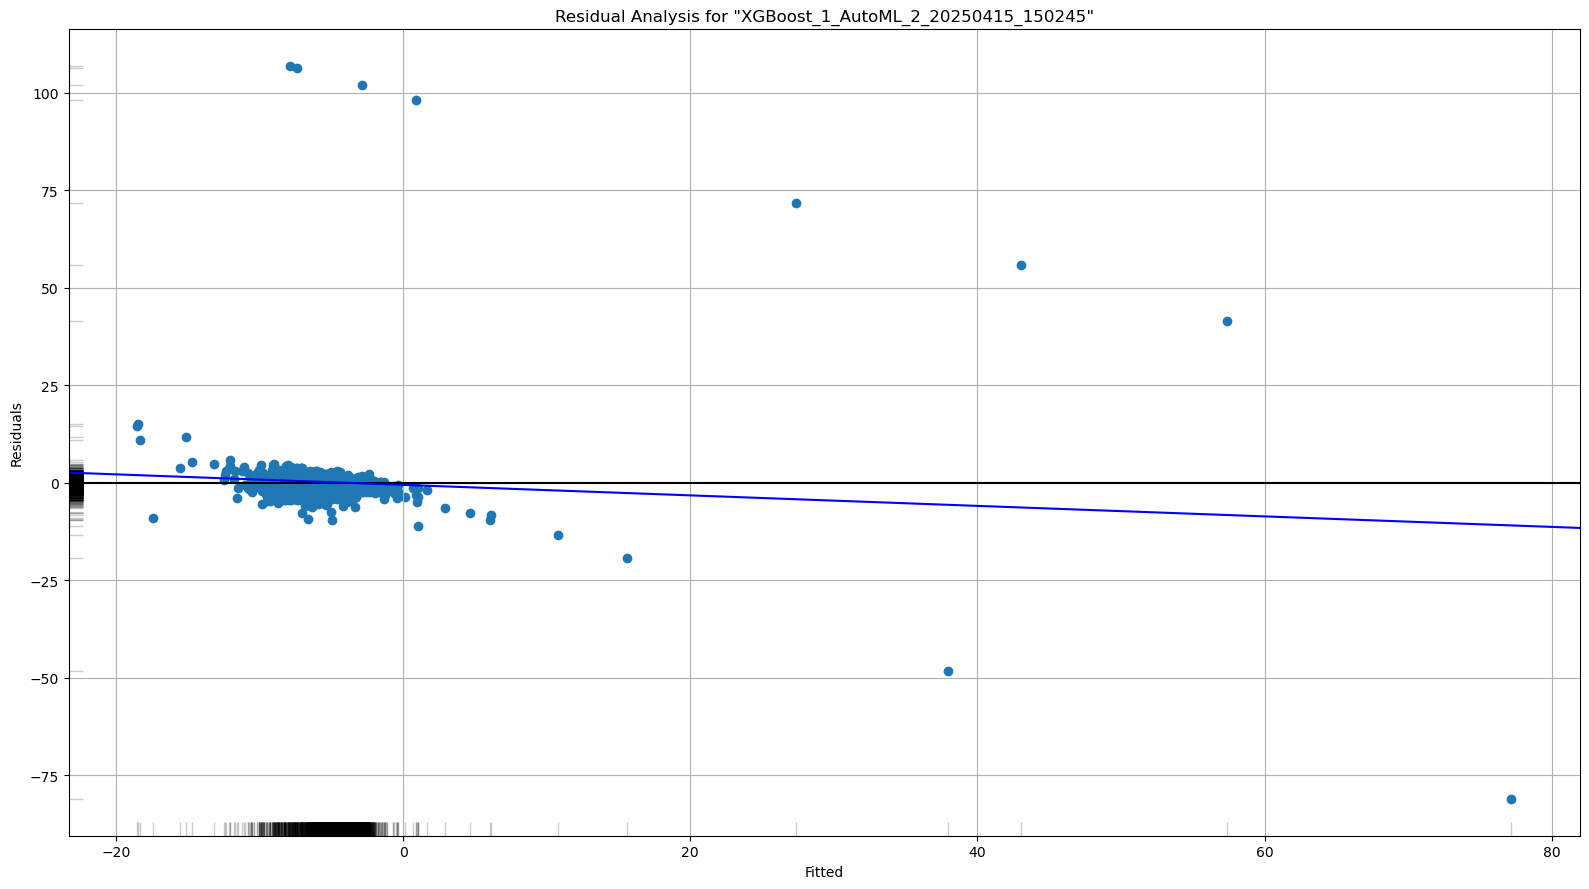

In [9]:
# Residual Analysis
ra = top_model.residual_analysis_plot(test_h2o)
ra

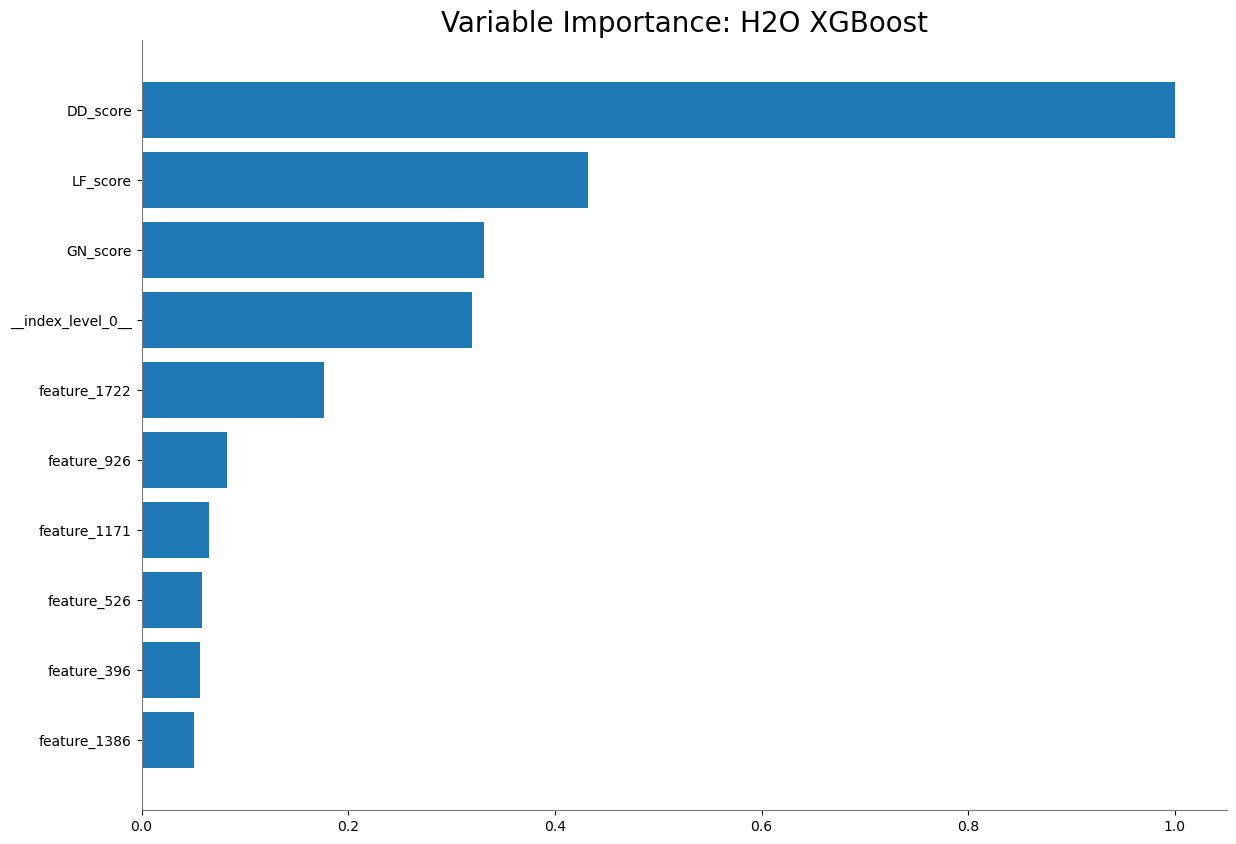

<Figure size 640x480 with 0 Axes>

In [10]:
var_plot = top_model.varimp_plot()
var_plot

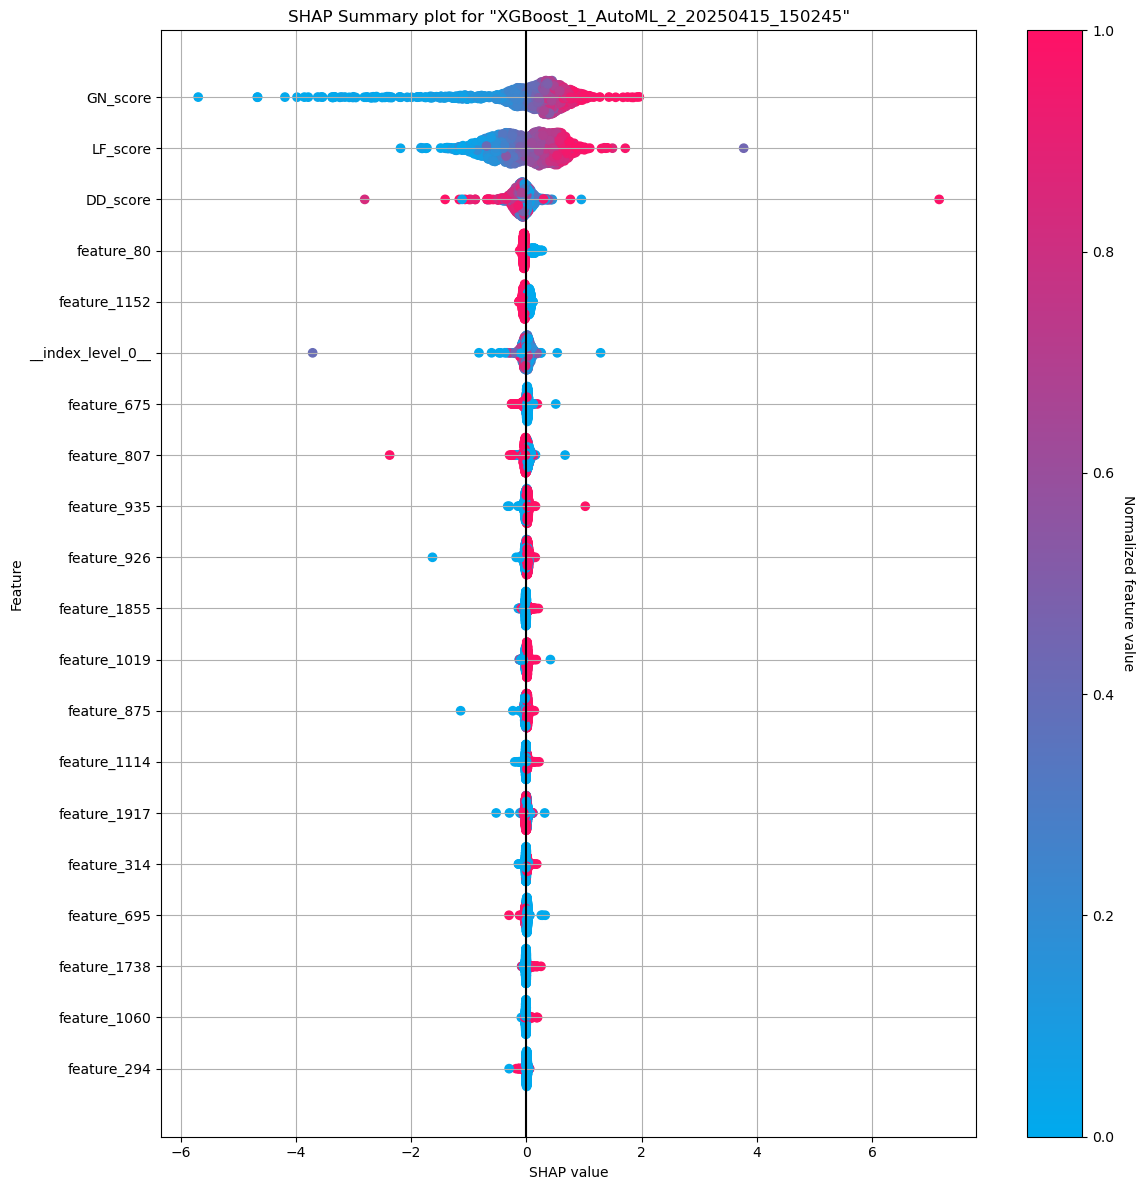

In [16]:
shap_plot = top_model.shap_summary_plot(test_h2o)
shap_plot

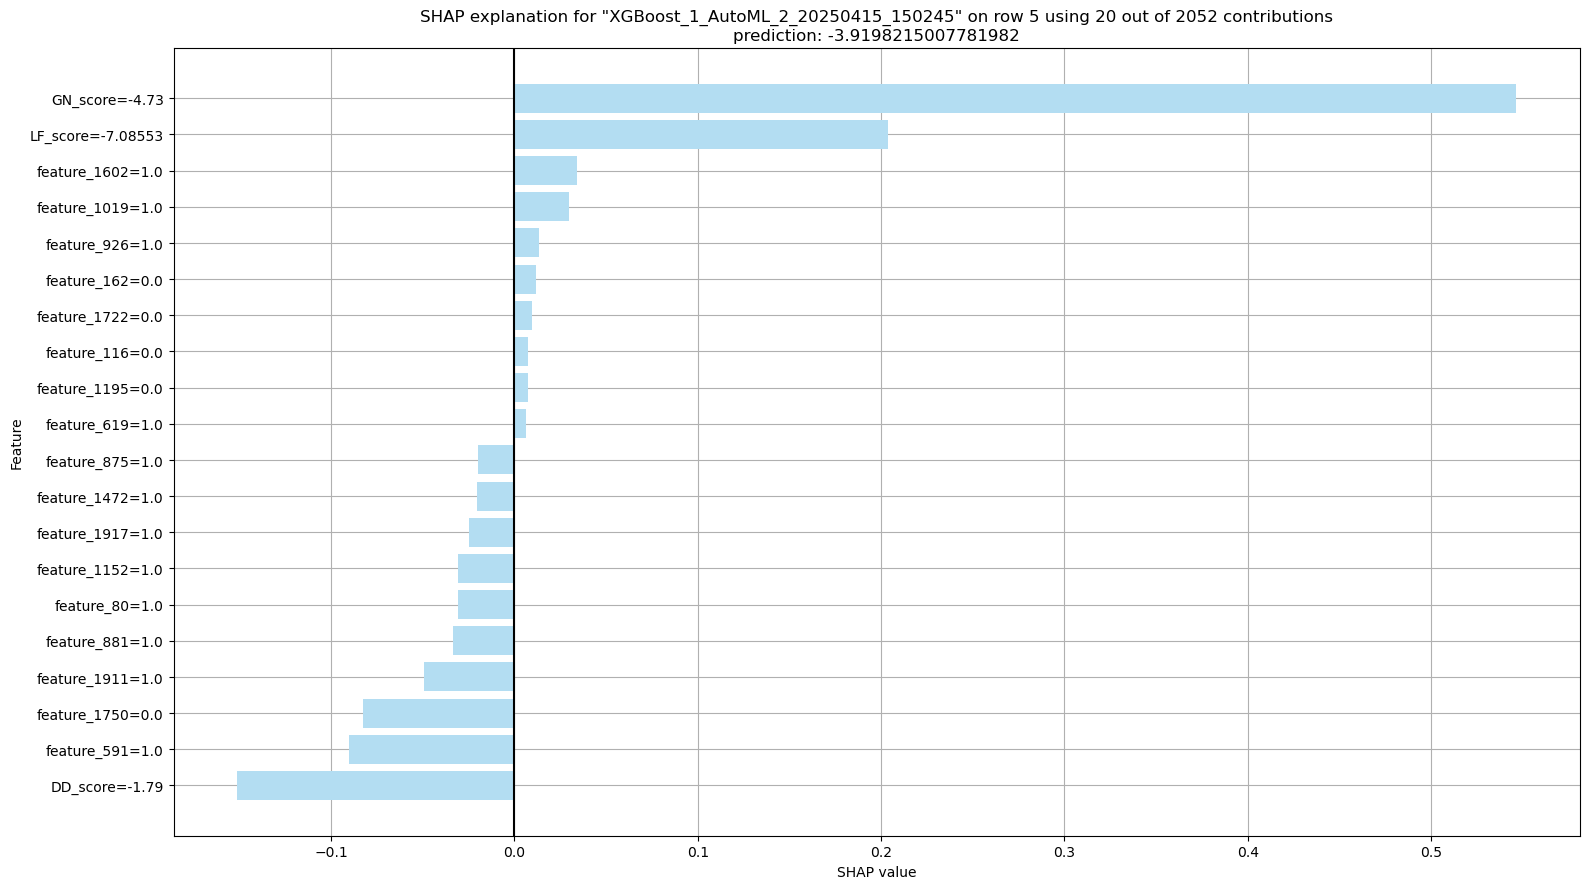

In [18]:
shapr_plot = top_model.shap_explain_row_plot(test_h2o, row_index=5)

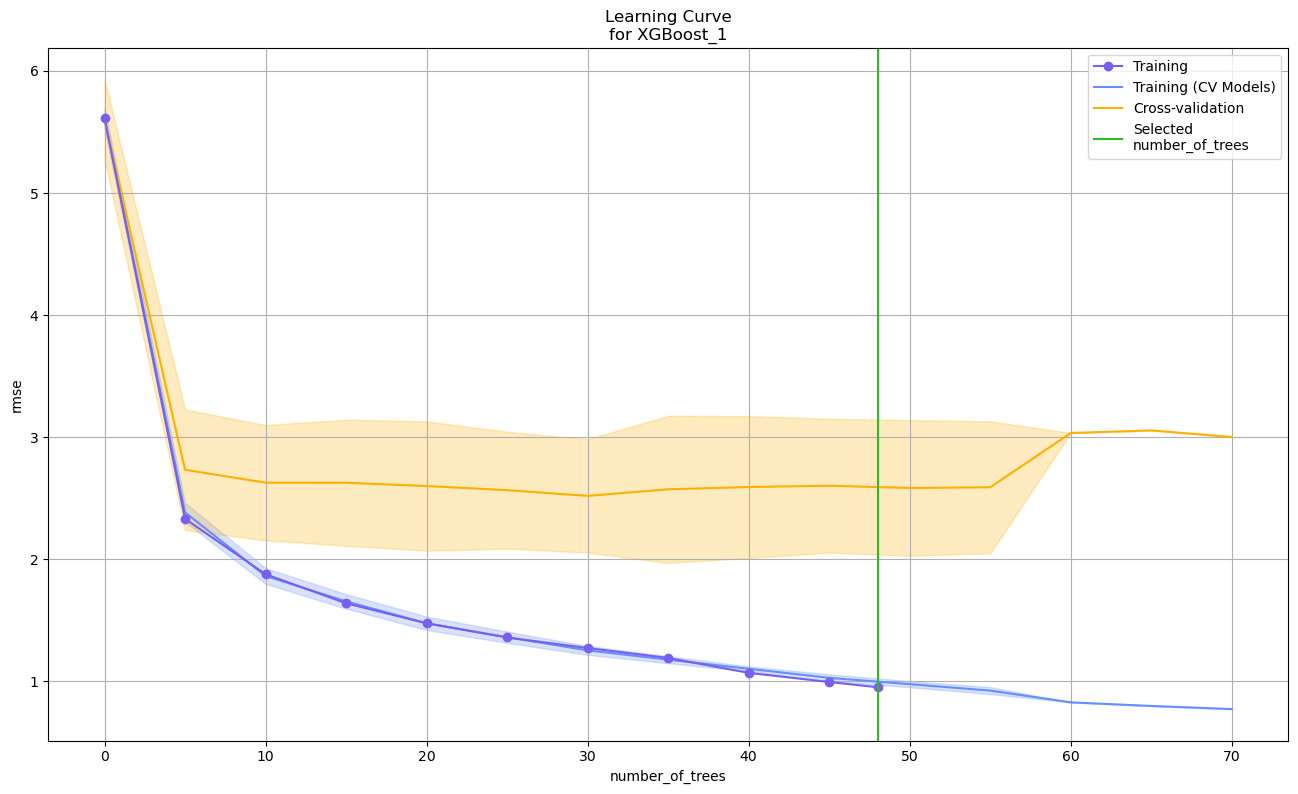

In [19]:
learning_curve_plot = top_model.learning_curve_plot()

In [31]:
perf = top_model.model_performance(train_h2o)
perf

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.9048282553429182
RMSE: 0.9512246082513416
MAE: 0.42618946030141036
RMSLE: NaN
Mean Residual Deviance: 0.9048282553429182

In [32]:
top_model.r2()

0.9103421724160972

In [4]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame
import pickle
import os

# Define the target
target = "CXCR4"  # Replace with WEE1 or CXCR4 as needed

# Start the H2O cluster
h2o.init()

# Load datasets
data_train = pq.read_table("intermediate_data/data_train_joined.parquet").to_pandas()
data_test = pq.read_table("intermediate_data/data_test_joined.parquet").to_pandas()

# Filter data for the selected target
data_train = data_train[data_train["Target Name"] == target]
data_test = data_test[data_test["Target Name"] == target]

# Define target column
target_column = " RMSD_Energy"

# Identify feature columns: all columns after "LF_score" (inclusive)
start_idx = list(data_train.columns).index("LF_score")
feature_columns = data_train.columns[start_idx:].tolist()

feature_columns = [col for col in feature_columns if col != " RMSD_Energy"]

# Convert to H2OFrame
train_h2o = H2OFrame(data_train)
test_h2o = H2OFrame(data_test)

# Train AutoML model
aml = H2OAutoML(max_models=1, seed=42)
aml.train(x=feature_columns, y=target_column, training_frame=train_h2o)

# Save the trained model
top_model = aml.leader

Checking whether there is an H2O instance running at http://localhost:54321.

/home/aanyam/.local/lib/python3.11/site-packages/h2o/backend/connection.py:390: UserWarning: Proxy is defined in the environment: HTTP_PROXY. This may interfere with your H2O Connection.
  warn("Proxy is defined in the environment: %s. "
/home/aanyam/.local/lib/python3.11/site-packages/h2o/backend/connection.py:390: UserWarning: Proxy is defined in the environment: http_proxy. This may interfere with your H2O Connection.
  warn("Proxy is defined in the environment: %s. "


.... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_432"; OpenJDK Runtime Environment (build 1.8.0_432-b06); OpenJDK 64-Bit Server VM (build 25.432-b06, mixed mode)
  Starting server from /home/aanyam/.local/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptgx4sea_
  JVM stdout: /tmp/tmptgx4sea_/h2o_aanyam_started_from_python.out
  JVM stderr: /tmp/tmptgx4sea_/h2o_aanyam_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/Detroit
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_aanyam_gyl31r
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.933 Gb
H2O_cluster_total_cores:    1
H2O_cluster_allowed_cores:  1
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.7 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
18:18:22.707: _train param, Dropping bad and constant columns: [feature_1619]

███████████████████████████████████████████████████████████████| (done) 100%


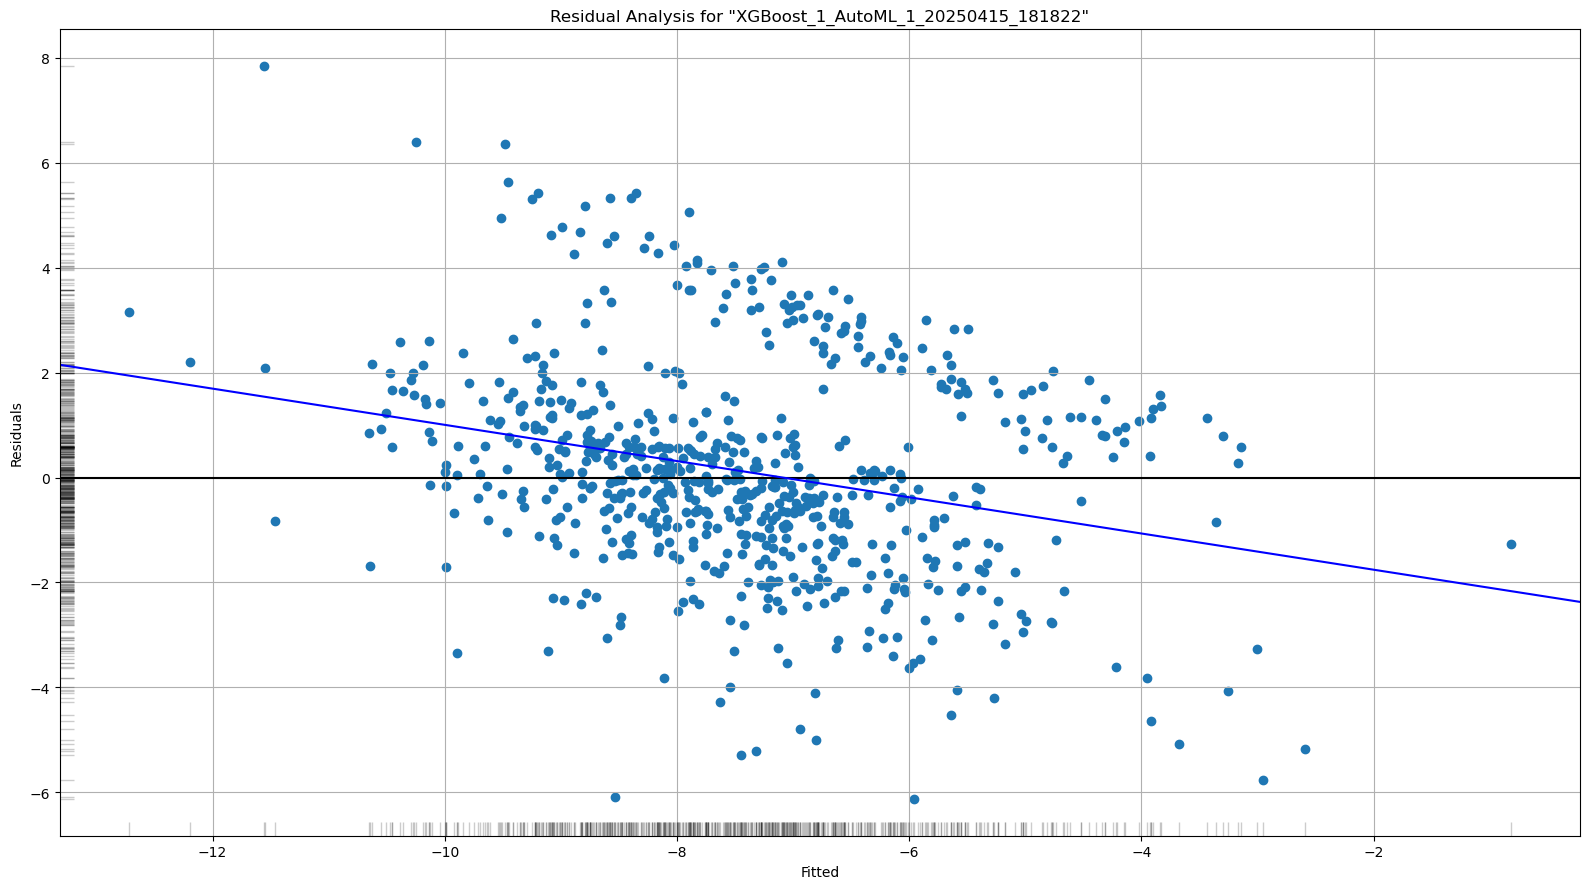

In [5]:
# Residual Analysis
ra = top_model.residual_analysis_plot(test_h2o)

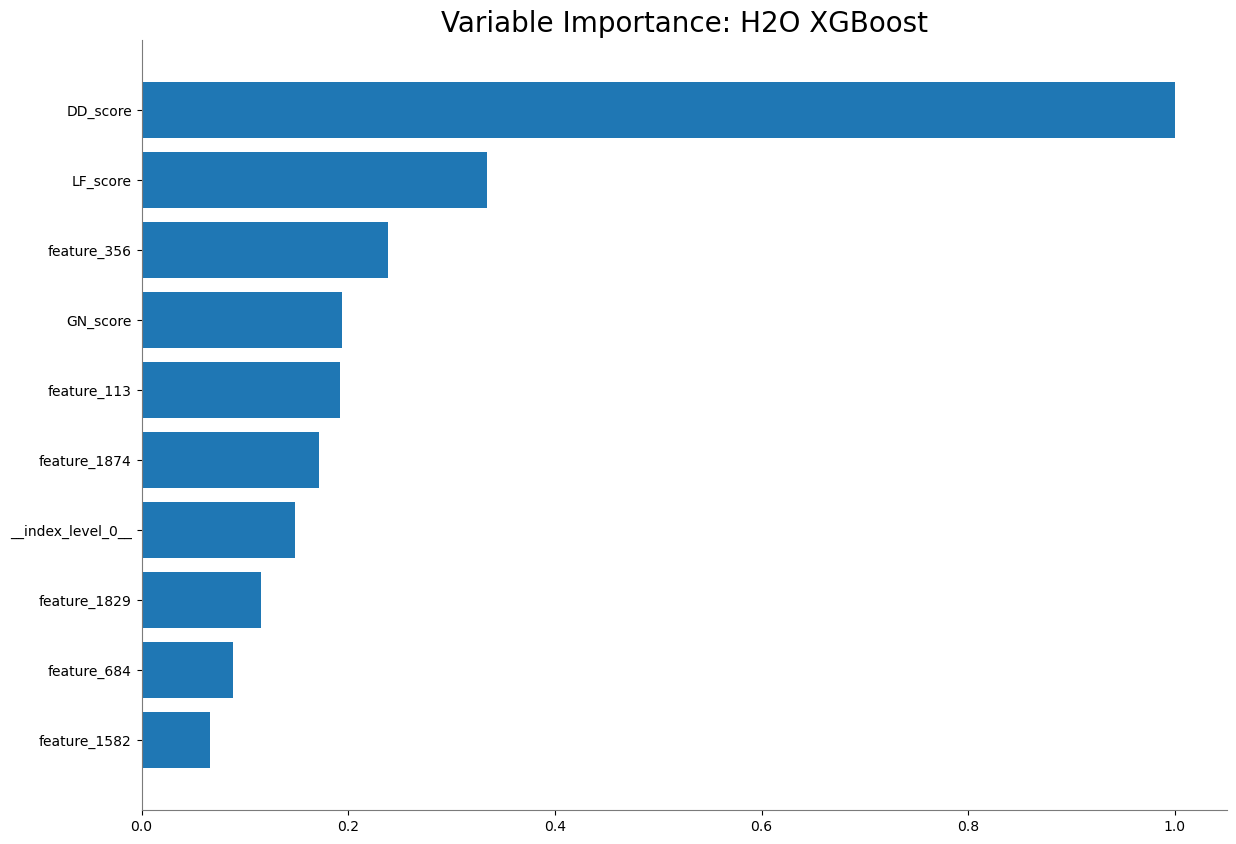

<Figure size 640x480 with 0 Axes>

In [6]:
var_plot = top_model.varimp_plot()

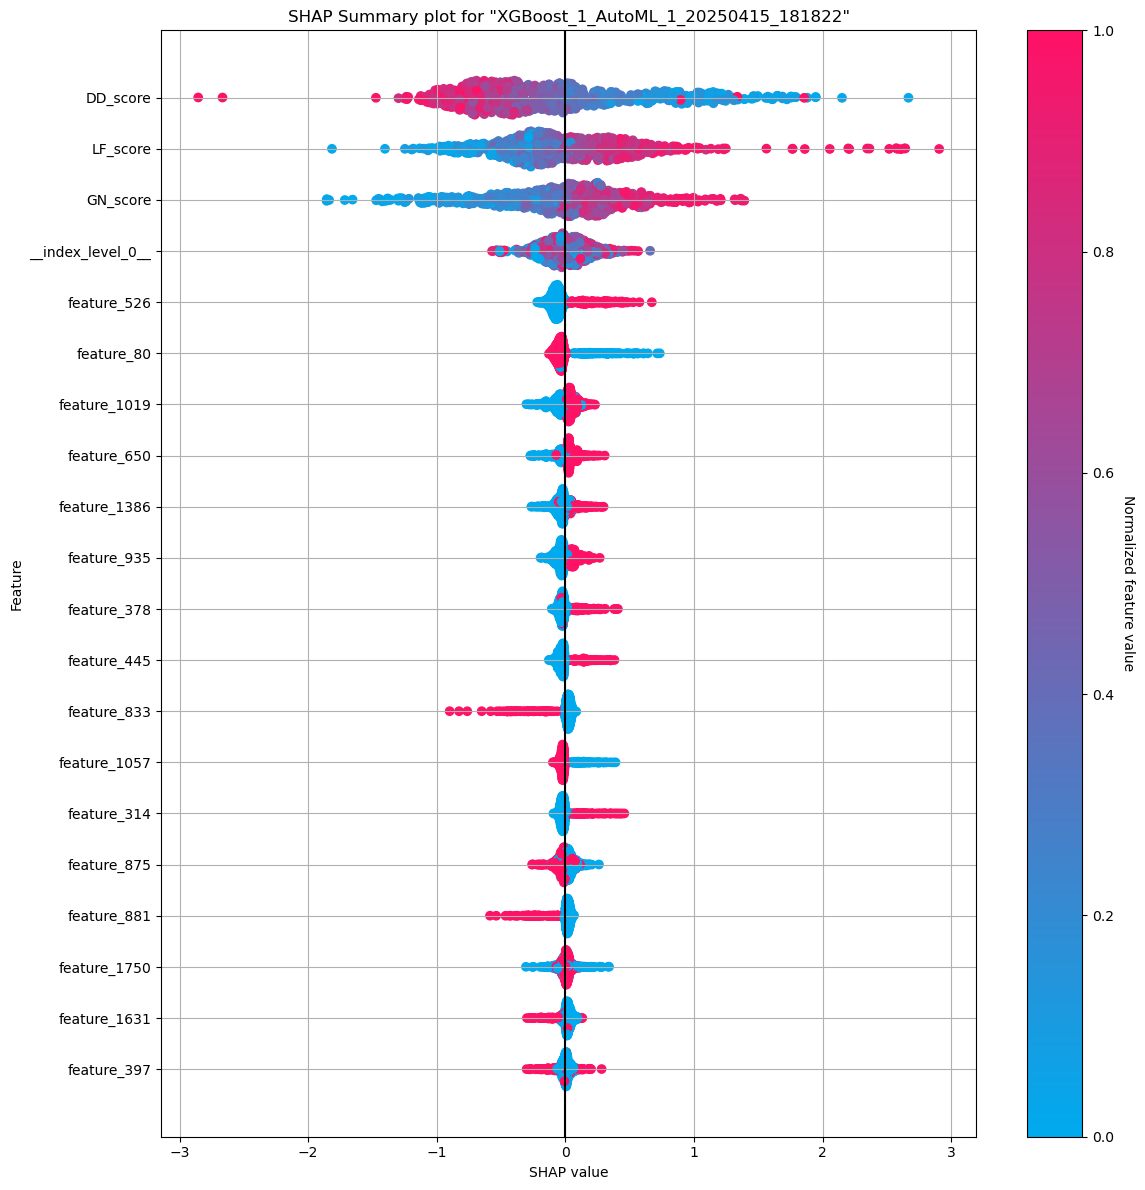

In [7]:
shap_plot = top_model.shap_summary_plot(test_h2o)

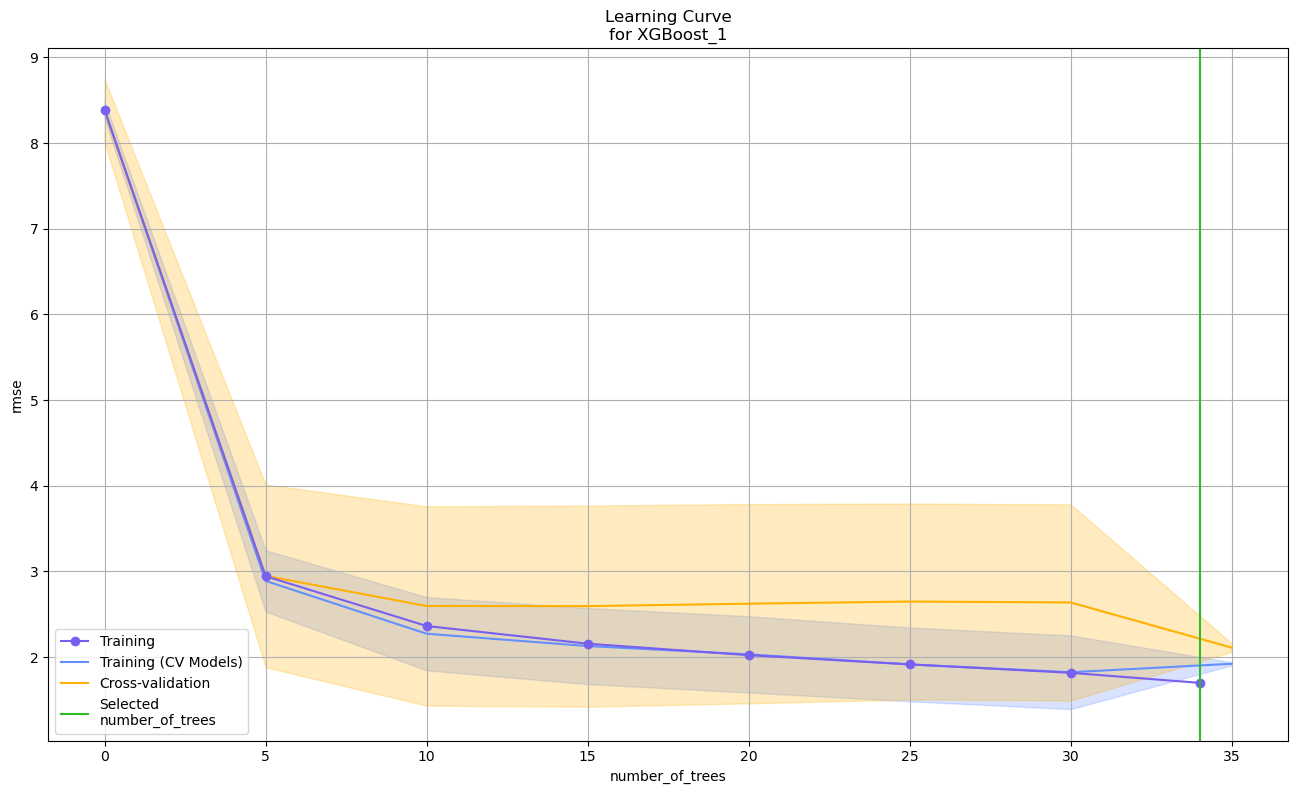

In [8]:
learning_curve_plot = top_model.learning_curve_plot()

In [9]:
perf = top_model.model_performance(train_h2o)
perf

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 2.88508507286857
RMSE: 1.698553818066584
MAE: 0.8920546717560719
RMSLE: NaN
Mean Residual Deviance: 2.88508507286857

In [10]:
top_model.r2()

0.6762805350505924

In [11]:
# Define the target
target = "WEE1"  # Replace with WEE1 or CXCR4 as needed

# Start the H2O cluster
h2o.init()

# Load datasets
data_train = pq.read_table("intermediate_data/data_train_joined.parquet").to_pandas()
data_test = pq.read_table("intermediate_data/data_test_joined.parquet").to_pandas()

# Filter data for the selected target
data_train = data_train[data_train["Target Name"] == target]
data_test = data_test[data_test["Target Name"] == target]

# Define target column
target_column = " RMSD_Energy"

# Identify feature columns: all columns after "LF_score" (inclusive)
start_idx = list(data_train.columns).index("LF_score")
feature_columns = data_train.columns[start_idx:].tolist()

feature_columns = [col for col in feature_columns if col != " RMSD_Energy"]

# Convert to H2OFrame
train_h2o = H2OFrame(data_train)
test_h2o = H2OFrame(data_test)

# Train AutoML model
aml = H2OAutoML(max_models=1, seed=42)
aml.train(x=feature_columns, y=target_column, training_frame=train_h2o)

# Save the trained model
top_model = aml.leader

Checking whether there is an H2O instance running at http://localhost:54321. connected.


/home/aanyam/.local/lib/python3.11/site-packages/h2o/backend/connection.py:390: UserWarning: Proxy is defined in the environment: HTTP_PROXY. This may interfere with your H2O Connection.
  warn("Proxy is defined in the environment: %s. "
/home/aanyam/.local/lib/python3.11/site-packages/h2o/backend/connection.py:390: UserWarning: Proxy is defined in the environment: http_proxy. This may interfere with your H2O Connection.
  warn("Proxy is defined in the environment: %s. "


--------------------------  -----------------------------
H2O_cluster_uptime:         5 mins 28 secs
H2O_cluster_timezone:       America/Detroit
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_aanyam_gyl31r
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.853 Gb
H2O_cluster_total_cores:    1
H2O_cluster_allowed_cores:  1
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.7 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


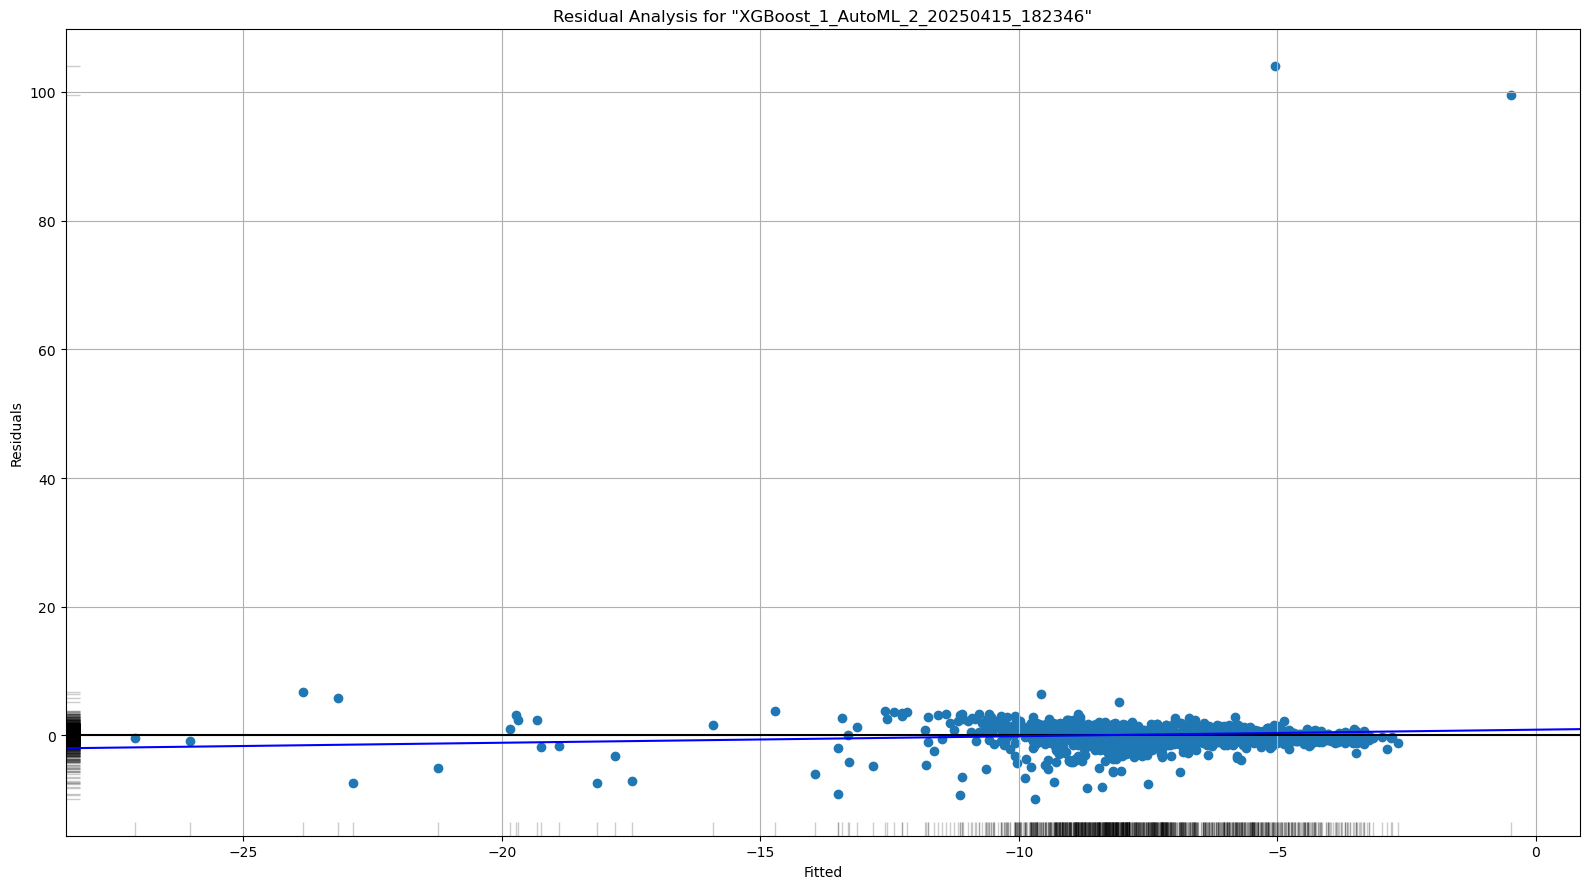

In [12]:
ra = top_model.residual_analysis_plot(test_h2o)

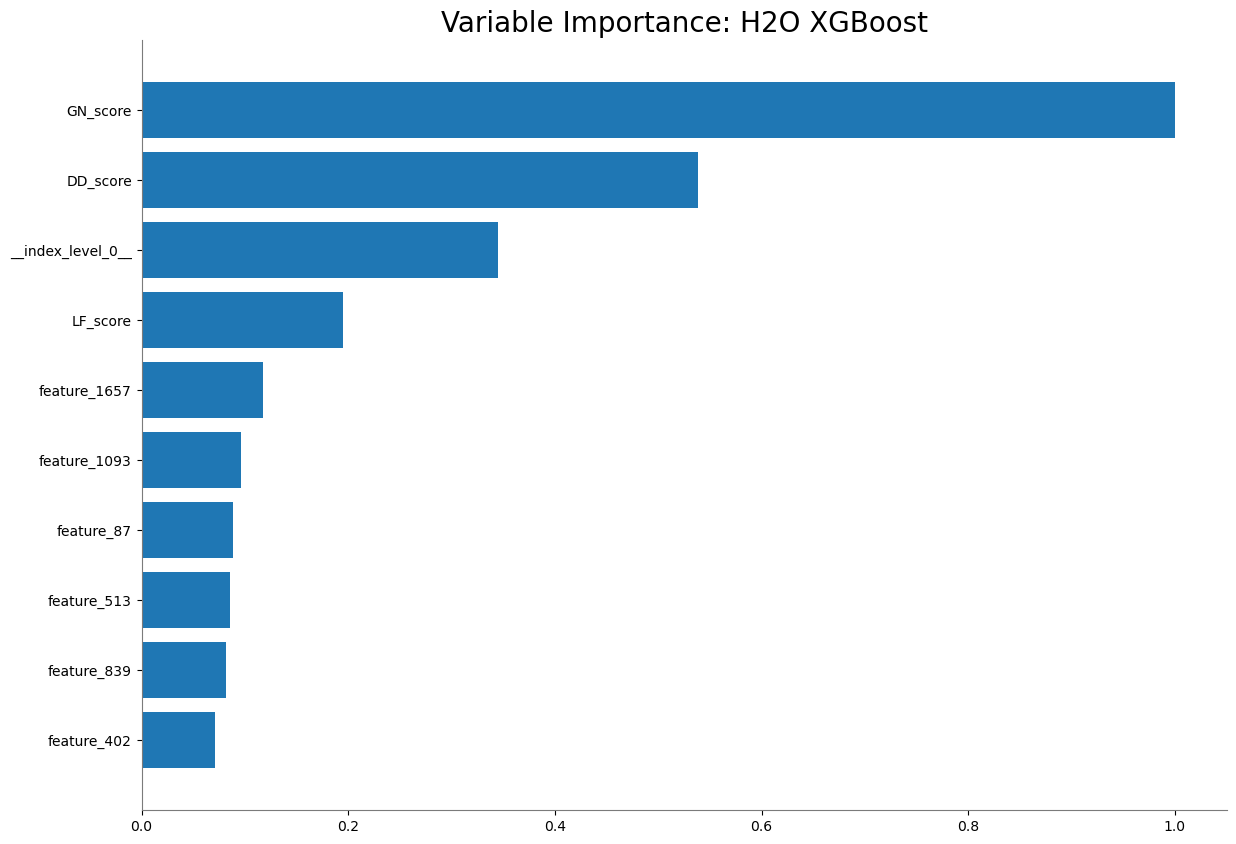

<Figure size 640x480 with 0 Axes>

In [13]:
var_plot = top_model.varimp_plot()

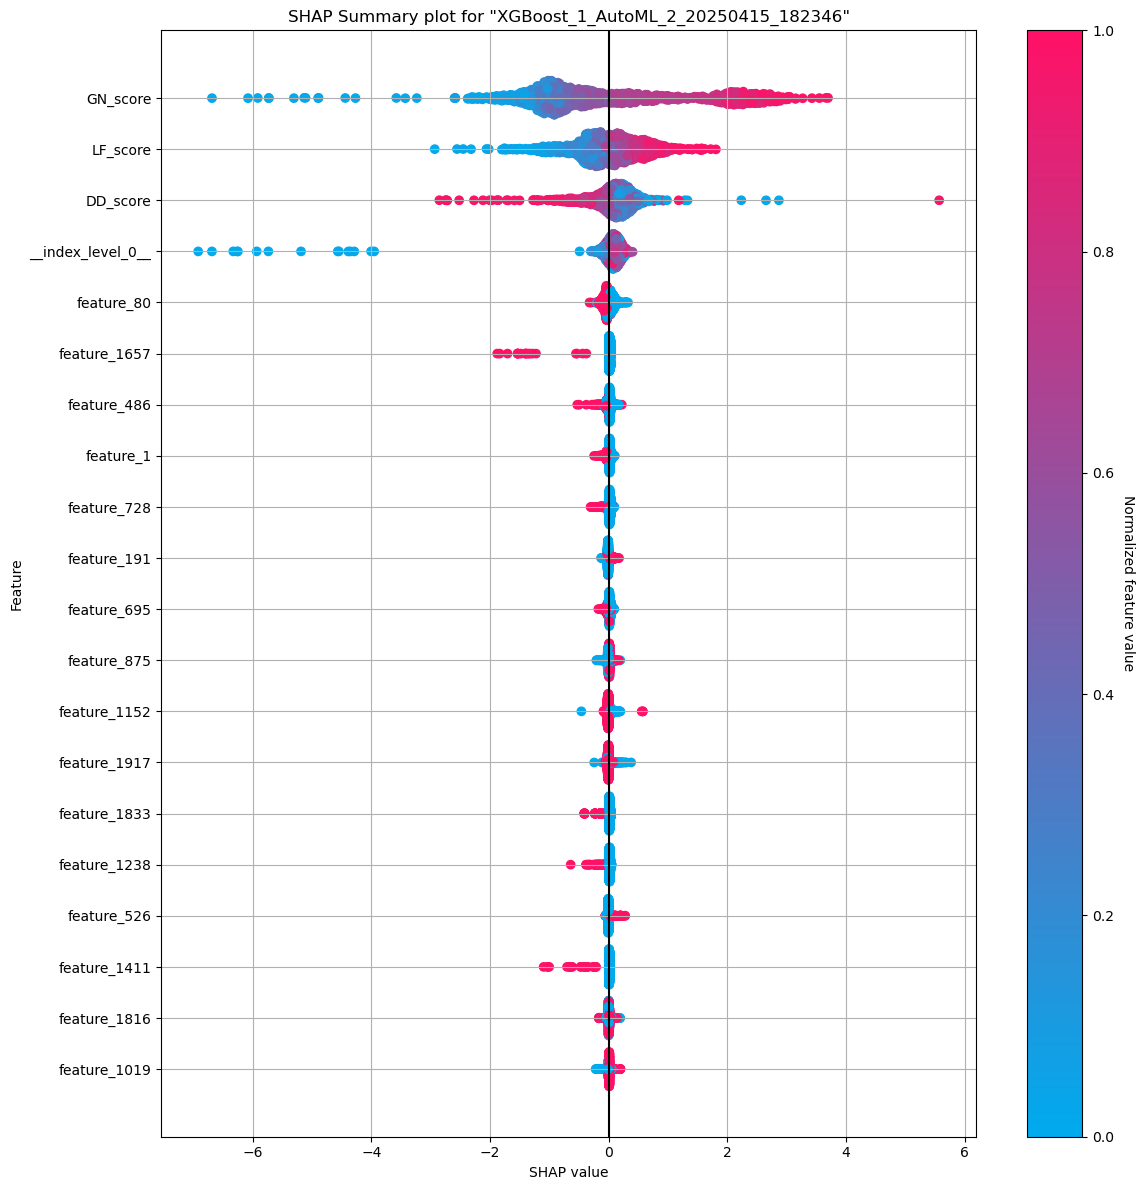

In [14]:
shap_plot = top_model.shap_summary_plot(test_h2o)

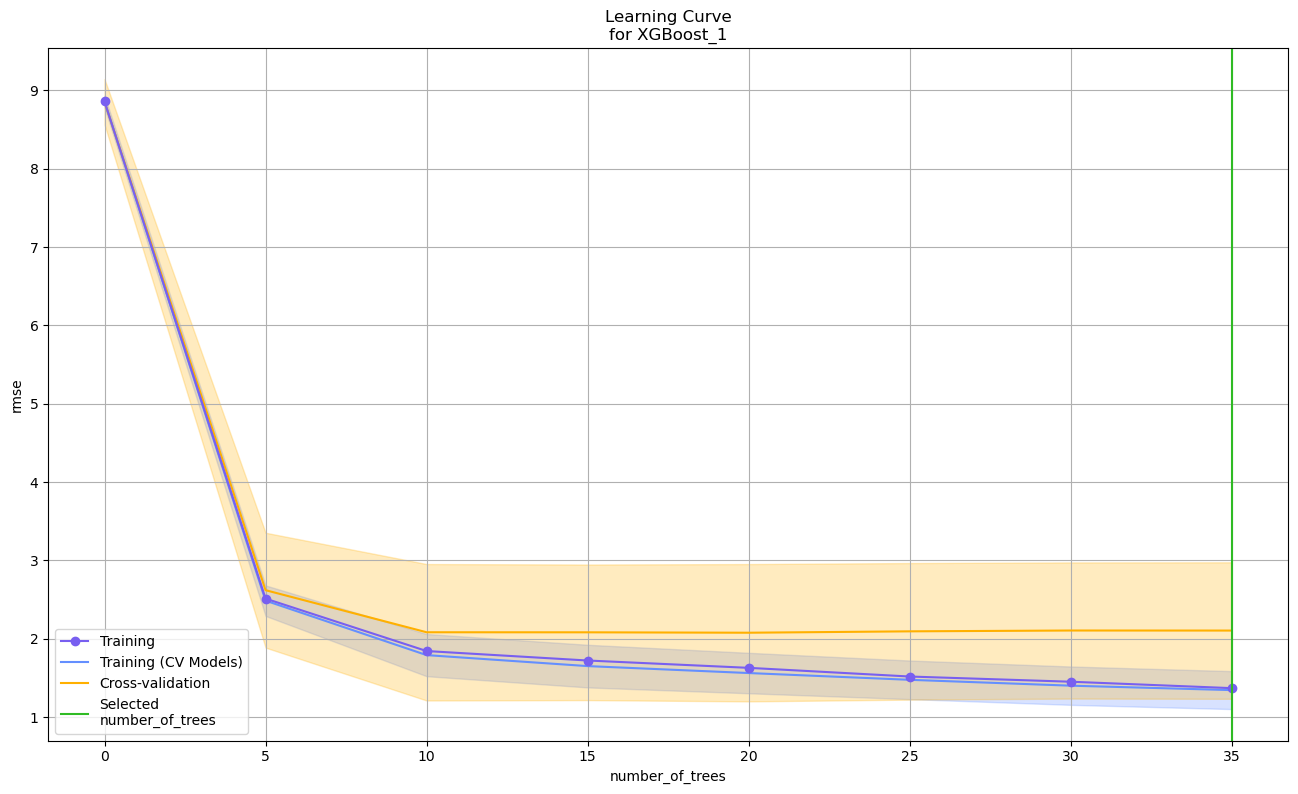

In [15]:
learning_curve_plot = top_model.learning_curve_plot()

In [16]:
perf = top_model.model_performance(train_h2o)
perf

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 1.8692945541253572
RMSE: 1.3672214722294838
MAE: 0.7164482343368461
RMSLE: NaN
Mean Residual Deviance: 1.8692945541253572

In [17]:
top_model.r2()

0.8105615048387955

In [18]:
predictions_train = aml.leader.predict(train_h2o).as_data_frame()
data_train["predictions"] = predictions_train["predict"]

predictions_test = aml.leader.predict(test_h2o).as_data_frame()
data_test["predictions"] = predictions_test["predict"]

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |

/home/aanyam/.local/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████| (done) 100%


/home/aanyam/.local/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


(array([ 1.,  0.,  1.,  0.,  3.,  8., 84., 48., 14.,  1.]),
 array([-23.16868591, -20.89972775, -18.63076958, -16.36181141,
        -14.09285325, -11.82389508,  -9.55493692,  -7.28597875,
         -5.01702058,  -2.74806242,  -0.47910425]),
 <BarContainer object of 10 artists>)

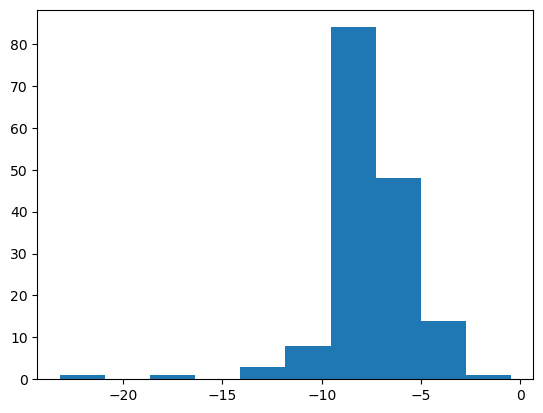

In [20]:
import matplotlib.pyplot as plt

plt.hist(data_test["predictions"])